## 1. Assessing the discriminative power of the input variables

In [3]:
#Extracting the data from the arff file to a pandas dataframe
import pandas as pd
from scipy.io import arff

data, meta = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data) #Creating a dataframe from the Data file

FileNotFoundError: [Errno 2] No such file or directory: 'column_diagnosis.arff'

Using the f_classif function to estimate the ANOVA f-score for each feature and assess their discriminative power

In [81]:
import sklearn
from sklearn.feature_selection import f_classif

In [82]:
#Separating the feature columns from the class column
X = df.drop(columns=['class'])
y = df[['class']]

f_scores= sklearn.feature_selection.f_classif(X, y.values.ravel()) #Calculating the F scores

In [83]:
feature_score = {col_name: value for col_name, value in zip(X, f_scores[0])} #Creating a dictionary with each feature as a key and its F score as its value
feature_score

{'pelvic_incidence': 98.53970917437658,
 'pelvic_tilt': 21.299194328989202,
 'lumbar_lordosis_angle': 114.98284047330131,
 'sacral_slope': 89.64395329777439,
 'pelvic_radius': 16.86693475538006,
 'degree_spondylolisthesis': 119.12288060759764}

In [84]:
# Identifying the input variable with the highest and lowest discriminative power

max_var, max_value = max(feature_score.items(), key=lambda x: x[1])
min_var, min_value = min(feature_score.items(), key=lambda x: x[1])

print("Input Variable with the highest discriminative power:", max_var, "| ANOVA F-score:", max_value)
print("Input Variable with the lowest discriminative power:", min_var, "| ANOVA F-score:", min_value)

Input Variable with the highest discriminative power: degree_spondylolisthesis | ANOVA F-score: 119.12288060759764
Input Variable with the lowest discriminative power: pelvic_radius | ANOVA F-score: 16.86693475538006


Plotting the class-conditional probability density function of the feature Degree of Spondylolisthesis

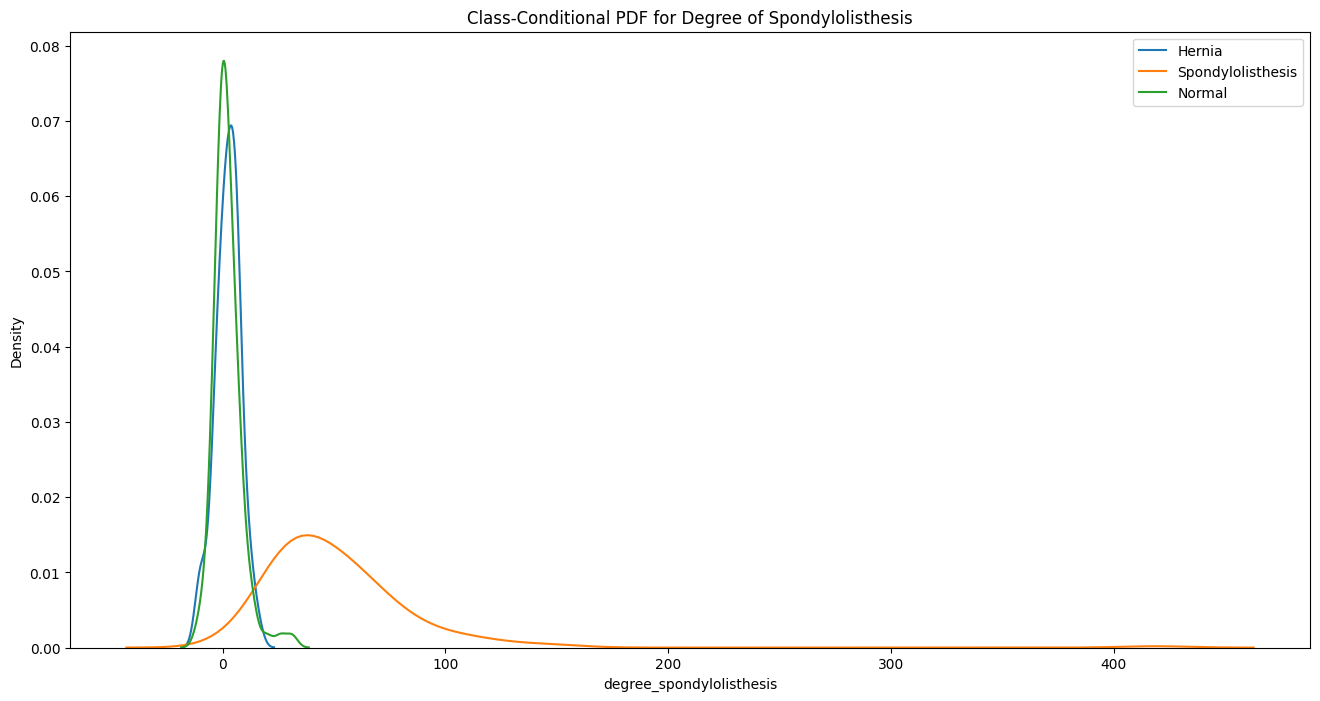

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Create a sample DataFrame (replace this with your actual DataFrame)
df1 = df[['degree_spondylolisthesis','class']]

class_values = df1['class'].unique() #Extracting the different class values

class_data = {}
for class_value in class_values: #Separating the dataset into subsets based on class
    class_data[class_value] = df1[df1['class'] == class_value]

for feature_column in df1.columns[:-1]:  # Exclude the class column
    plt.figure(figsize=(16, 8))
    for class_value, data in class_data.items():
        sns.kdeplot(data[feature_column], label=class_value.decode('utf-8'))
        
    plt.title(f'Class-Conditional PDF for Degree of Spondylolisthesis')
    plt.xlabel(feature_column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Plotting the class-conditional probability density function of the feature Pelvic Radius


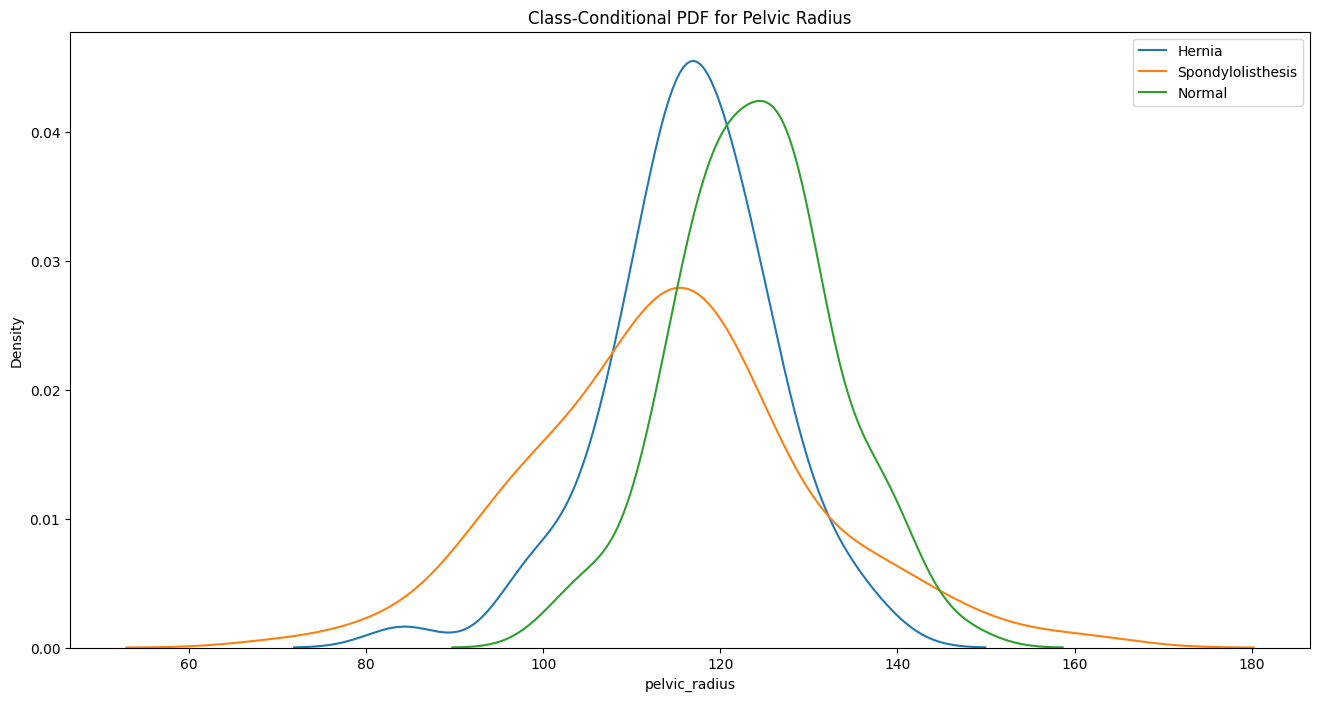

In [86]:
df1 = df[['pelvic_radius','class']]

class_values = df1['class'].unique() #Extracting the different class values

class_data = {}
for class_value in class_values: #Separating the dataset into subsets based on class
    class_data[class_value] = df1[df1['class'] == class_value]

for feature_column in df1.columns[:-1]:  # Exclude the class column
    plt.figure(figsize=(16, 8))
    for class_value, data in class_data.items():
        sns.kdeplot(data[feature_column], label=class_value.decode('utf-8'))
        
    plt.title(f'Class-Conditional PDF for Pelvic Radius')
    plt.xlabel(feature_column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## 2. Decision Tree depth assessment

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

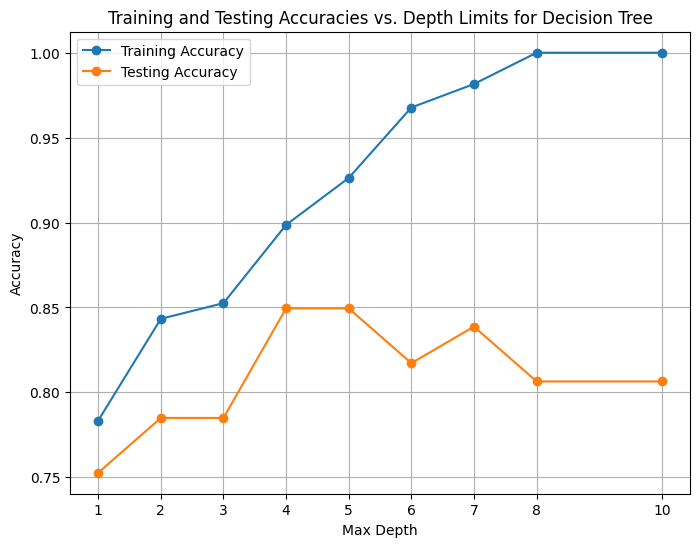

In [88]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

depths = [1,2,3,4,5,6,7,8,10] #Max depths to be evaluated
train_accuracies = []
test_accuracies = []
num_runs = 50 #Running 50 times instead of 10

for depth in depths:
    
    train_acc_sum = 0.0
    test_acc_sum = 0.0
    
    for i in range(num_runs):  
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0,stratify=y) #Splitting into training and testing dataset
        tree_classifier = DecisionTreeClassifier(max_depth = depth, random_state = 0)
        
        tree_classifier.fit(X_train, y_train) #training the classifier
        
        y_train_pred = tree_classifier.predict(X_train) #Classifying the training dataset
        train_accuracy = accuracy_score(y_train, y_train_pred) #Training dataset classification accuracy
        train_acc_sum += train_accuracy 
        
        y_test_pred = tree_classifier.predict(X_test) #Classifying the testing dataset
        test_accuracy = accuracy_score(y_test, y_test_pred) #Testing dataset classification accuracy
        test_acc_sum += test_accuracy

    train_avg_accuracy = train_acc_sum / num_runs #Accuracy average of the 50 different runs
    test_avg_accuracy = test_acc_sum / num_runs
    
    train_accuracies.append(train_avg_accuracy)
    test_accuracies.append(test_avg_accuracy)    
    
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', linestyle='-', label='Testing Accuracy')
plt.title('Training and Testing Accuracies vs. Depth Limits for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.xticks(depths)
plt.show()
    


## 3. Results Interpretation

In the plotted graph we can observe the disparity between training and testing accuracy. As anticipated, the training accuracy consistently outperforms testing accuracy across all tested depths. This discrepancy is expected, as models typically excel when applied to data they have been specifically trained on, but perform worse with unseen data. 

Furthermore, an increase in maximum depth of the decision tree leads to a better training accuracy. This outcome is to be anticipated, as deeper trees are able to identify more details in the training data. However, we observe a decrease in testing accuracy, which demonstrates a rise in the degree of overfitting in the model. This was also expected, as further identification of training data details, relatioships and noise leads to a worse performance in unseen data, since the intricate details and relationships in the training set may poorly represent a larger dataset.

An increase in depth decreases the generalization capacity of the model, observed in the decline of testing accuracy, a poorer performance for unseen data, accompanied by a constrasting increase in training accuracy. The generalization capacity of the model is negatively affected by the increase in maximum depth of the decision tree due to overfitting, the model learns extensively the training set and its details, but then fail to accurately identify details and relationships in unseen data.

## 4. Single Decision Tree


In [4]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable
y_encoded = label_encoder.fit_transform(y) #Encoding the classes


tree_classifier = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)

# Fit the decision tree to all available data
tree_classifier.fit(X, y_encoded)
# i. Plot the decision tree
plt.figure(figsize=(12, 10))
plot_tree(tree_classifier, feature_names = X.columns.tolist(),filled=True, class_names= ["Diabetes",'Normal'])
plt.title('Decision Tree Plot')
plt.show()

NameError: name 'df' is not defined

Characterize hernia condition by identifying hernia-conditional associations

In [91]:
#Studying feature importance
feature_importance = dict(zip(X.columns, tree_classifier.feature_importances_))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# Print the features associated with hernia by order of importance
top_hernia_associated_features = [feature for feature, importance in sorted_features if importance > 0] #Importance has to be bigger than 0 otherwise it is not hernia-conditional
print("Top features associated with Hernia:")
for feature in top_hernia_associated_features:
    print(feature)

Top features associated with Hernia:
degree_spondylolisthesis
sacral_slope
pelvic_radius
